# Simulando pesquisas eleitorais com Python

In [2]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Primeiro, definimos o tamanho do eleitorado e o número de votos para os quais vamos simular e definimos a função 'pesquisa'

In [3]:
eleitorado = 150000000                       #Eleitorado: Quantidades maxima de pessoas aptas a votar
votacao = 60000000                           #Votacao: Quantidades de votos que um candidato X recebeu na eleeção.
def pesquisa(eleitorado, votacao, amostra):  #Amostra: Numero de pessoas entrevistadas na pesquisa 
    resultado = 0
    for i in range(amostra):
        chave = random.randint(0,eleitorado) #Chave: Numero gerado de 0 a eleitorado visando apenas aleatorizar.
        if chave < votacao:
            resultado += 1
        else:
            resultado += 0
    return (resultado/amostra) * eleitorado

## Agora vamos simular uma pesquisa:

In [4]:
amostra = 100
resultado_pesquisa = pesquisa(eleitorado, votacao, amostra)
erro = ((resultado_pesquisa - votacao)/eleitorado)*100


print("resultado: {}, erro:{}".format(resultado_pesquisa, erro))

resultado: 57000000.0, erro:-2.0


## Depois, definimos o número de simulações de pesquisa que queremos executar e definimos a função 'Simulacao'

### Essa função retorna o resultado médio e o erro médio depois de realizadas 'simulacoes' pesquisas.

In [5]:
simulacoes = 2000                   #Numero de simulações realizadas
amostra = 2000                      #Numero de pessoas entrevistadas na pesquisa
def simulacao(simulacoes, amostra):
    soma_resultado = 0
    soma_erro = 0
    for i in range(simulacoes):
        resultado = pesquisa(eleitorado, votacao, amostra)
        soma_resultado += resultado
        soma_erro += resultado / eleitorado
    erro_medio = soma_erro / simulacoes
    resultado_medio = soma_resultado/ simulacoes
    return resultado_medio, erro_medio

## Agora vamos visualizar a diferença do erro médio para tamanhos diferentes de amostra

### O código abaixo faz 150 simulações em diferentes tamanhos de amostra. A amostra varia de 10 em 10, partindo de 10 a 1500. No total, são feitas 150.000 'pesquisas'.

In [9]:
valores_amostra = []
resultado_medio = []
erro_medio = []
for i in range(300):
    resultado_medio.append(0)
    erro_medio.append(0)
for i in range(1,301):            #Importante começar em 1 pois se começar em zero, vai zerar a primeira amostra.
    valores_amostra.append(i*10)
for i in range(300):
    resultado_medio[i], erro_medio[i] = simulacao(1000, valores_amostra[i])
print("Finalizado")

Finalizado


## Vizualizando a variação do erro quando se varia as amostras.

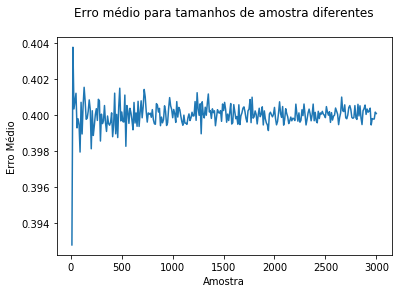

In [10]:
plt.xlabel("Amostra")
plt.ylabel("Erro Médio")
plt.title("Erro médio para tamanhos de amostra diferentes\n")
plt.plot(valores_amostra, erro_medio)
plt.show()

## Agora, algo também interessante. Podemos variar randomicamente a votação e o eleitorado para cada uma das 150.000 pesquisas. Nessa função estamos apenas interessados no erro.

In [11]:
def simulacao_aleatoria(simulacoes, amostra):
    soma_resultado = 0
    soma_erro = 0
    for i in range(simulacoes):
        eleitorado = random.randint(0,10000000000) #De 0 a 10 Bilhões
        votação = random.randint(0,eleitorado)
        resultado = pesquisa(eleitorado, votacao, amostra)
        soma_erro += resultado / eleitorado
    erro_medio = soma_erro / simulacoes
    return erro_medio

In [12]:
valores_amostra = []
erro_medio = []
for i in range(1,151):
    erro_medio.append(0)
for i in range(1,151):
    valores_amostra.append(i*10)
for i in range(0,150):
    erro_medio[i] = simulacao_aleatoria(1000, valores_amostra[i])
print("Finalizado")

Finalizado


## Agora, vamos vizualizar Erro Médio x Amostra para eleitorados e votações geradas randomicamente.

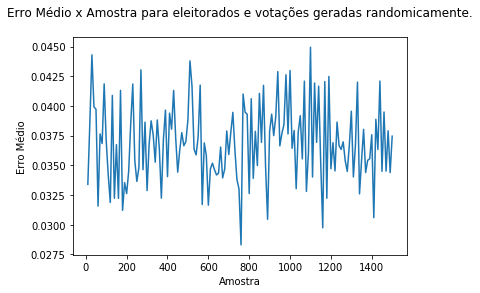

In [13]:
plt.xlabel("Amostra")
plt.ylabel("Erro Médio")
plt.title("Erro Médio x Amostra para eleitorados e votações geradas randomicamente.\n")
plt.plot(valores_amostra, erro_medio)
plt.show()

## Podemos concluir, então, que mesmo com eleitorados e votações completamente aleatórias o erro não excede 4.6 pontos percentuais para amostras menores que 1500.

#### Código elaborado por João Pedro Oliveira. 2018